In [1]:
# File system manangement
import time, psutil, os

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data




In [2]:

df_train = pd.read_csv("training.zip", compression='zip')

df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [3]:
df_train_signal = df_train[df_train.Label == 's']
df_train_background = df_train[df_train.Label == 'b']
#verify with the head option

In [5]:
df_train_signal.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s
15,100015,111.026,32.096,75.271,23.067,-999.000,-999.000,-999.000,3.205,23.067,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.018636,s


In [7]:
df_train_background.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.00,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.00,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.00,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.00,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.54,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b


In [9]:
s_DER_mass_transverse_met_lep = df_train_signal["DER_mass_transverse_met_lep"].to_numpy()
b_DER_mass_transverse_met_lep = df_train_background["DER_mass_transverse_met_lep"].to_numpy()


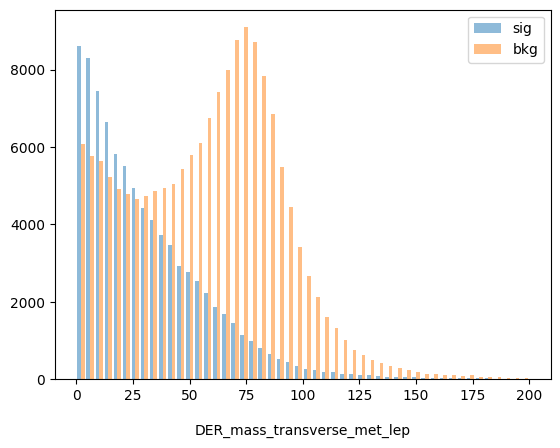

In [10]:
plt.hist([s_DER_mass_transverse_met_lep, b_DER_mass_transverse_met_lep], bins=50, range=[0,200], alpha=0.5, label=['sig', 'bkg'])
plt.xlabel('DER_mass_transverse_met_lep', labelpad=15)
plt.legend(loc='upper right')

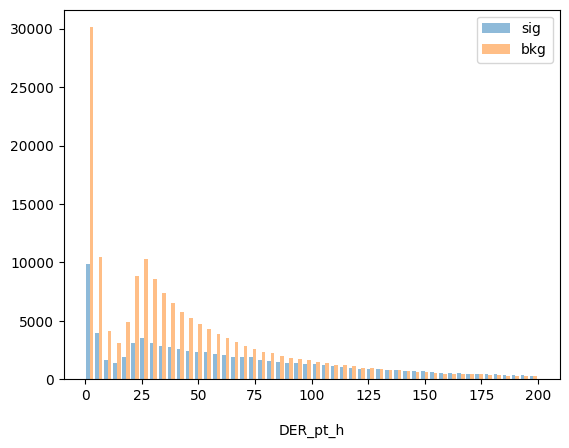

In [11]:
s_DER_pt_h = df_train_signal["DER_pt_h"].to_numpy()
b_DER_pt_h = df_train_background["DER_pt_h"].to_numpy()
plt.hist([s_DER_pt_h, b_DER_pt_h], bins=50, range=[0,200], alpha=0.5, label=['sig', 'bkg'])
plt.xlabel('DER_pt_h', labelpad=15)
plt.legend(loc='upper right')

In [13]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split

In [15]:
df_train['Label'] = df_train['Label'].replace({'s': 1, 'b': 0})
#df_train['Label'].replace({'s': 1, 'b': 0}, inplace=True)
# X = np.array(df_train.drop(['EventId','Label','Weight'], 1).astype(float))
X = np.array(df_train.drop(['EventId', 'Label', 'Weight'], axis=1).astype(float))

y = np.array(df_train['Label'])
X=X[:15000]
y=y[:15000]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
clf = svm.SVC(probability=True)

clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.6996666666666667


In [19]:
from xgboost import XGBClassifier

In [20]:
xgbc = XGBClassifier()
# df_train['Label'] = df_train['Label'].replace({'s': 1, 'b': 0})
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [21]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(xgbc, X_train, y_train)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.82


In [22]:
import pandas

In [ ]:
'''

1) Produce S vs B histograms shape normalized for all input features other than event 1d, weight and label
2) Produce the ROC curve both for SVC and XGB
3) Play with the relevant hyperparameters and submit your best models for both cases

'''

In [30]:
feature_columns = [col for col in df_train.columns if col not in ['EventId', 'Weight', 'Label']]
print("Features for histogram analysis:")
for feature in feature_columns:
    print(feature)



Features for histogram analysis:
DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt


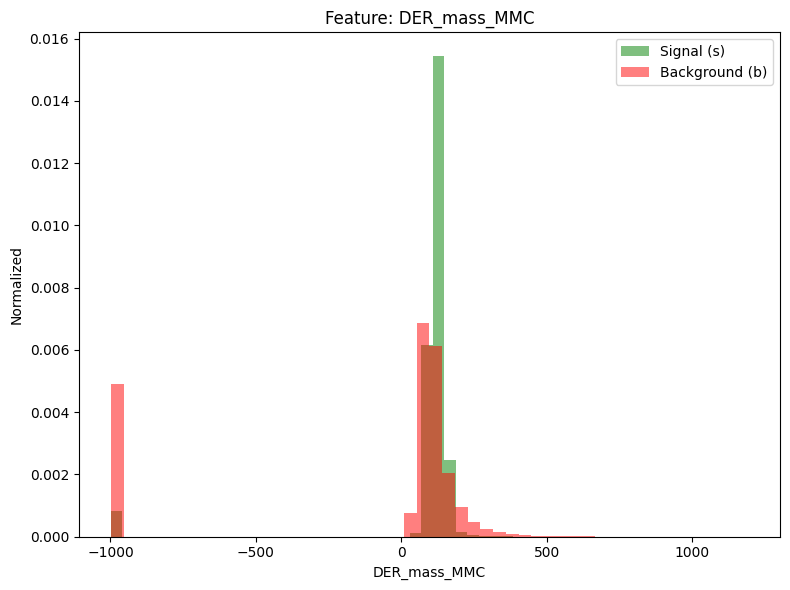

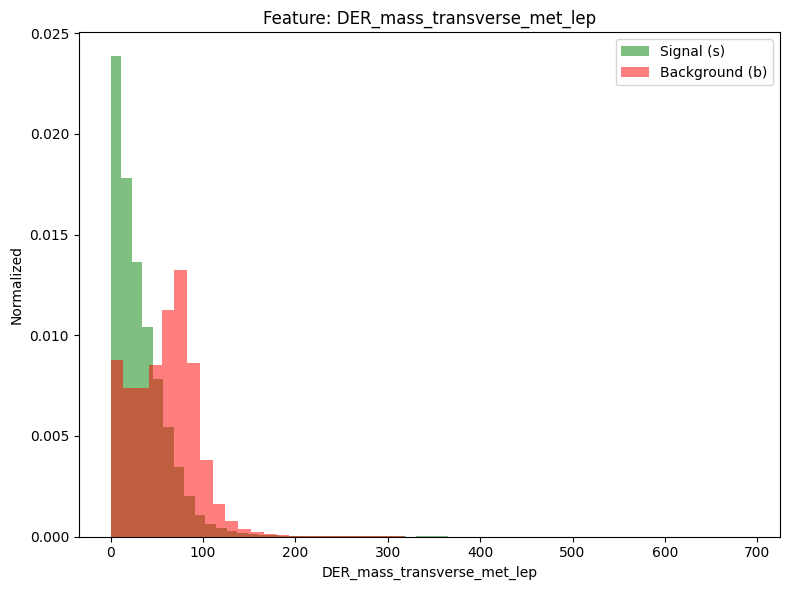

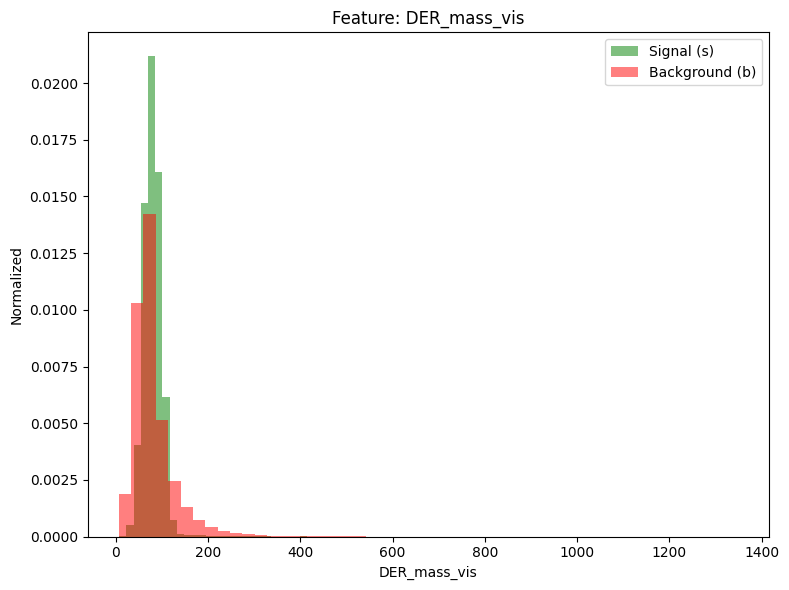

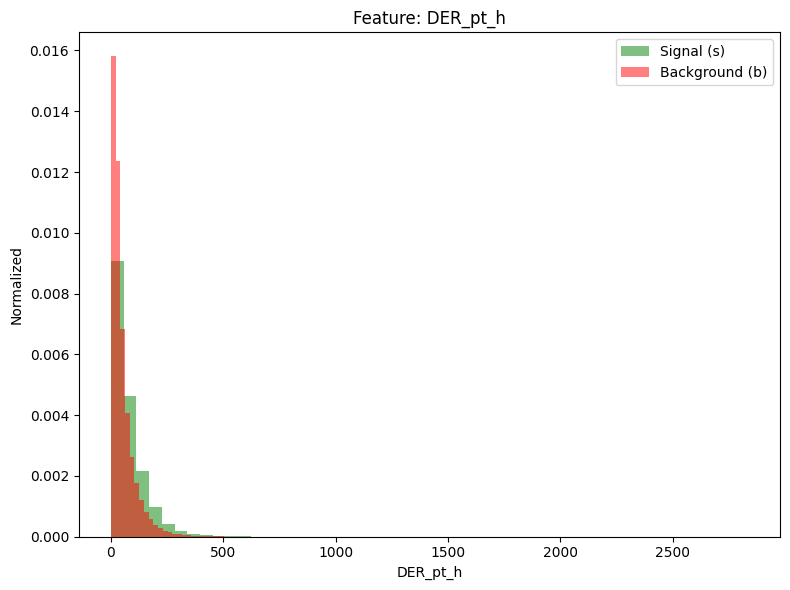

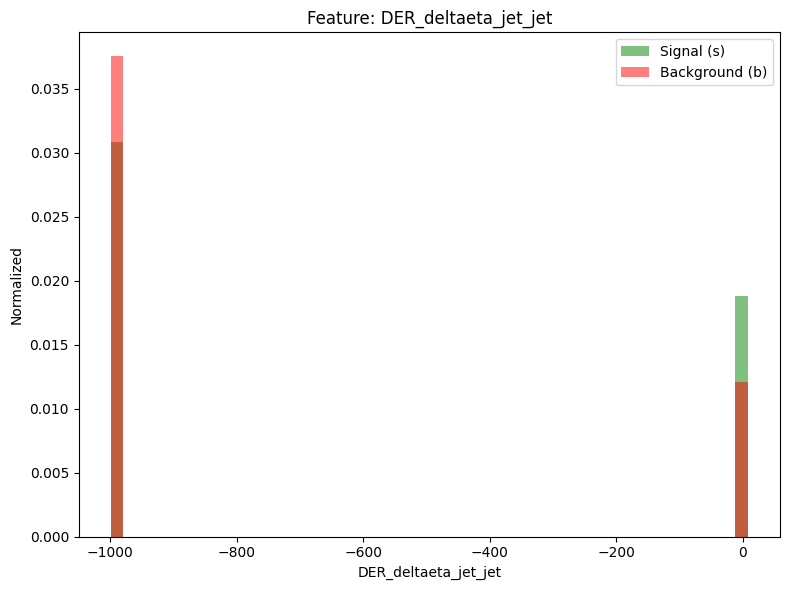

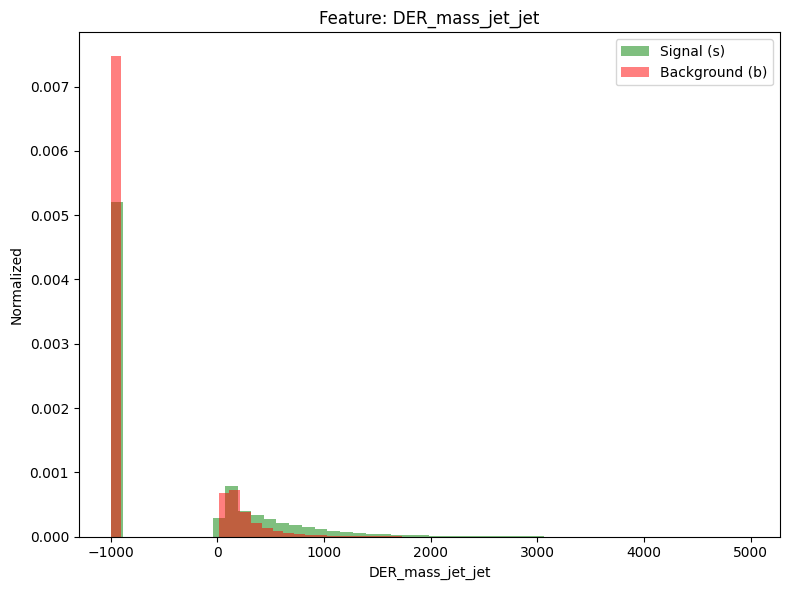

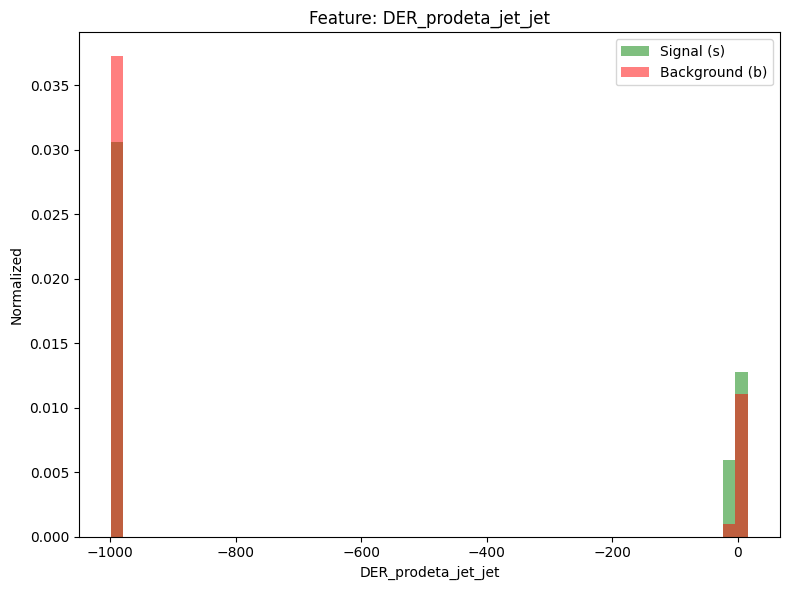

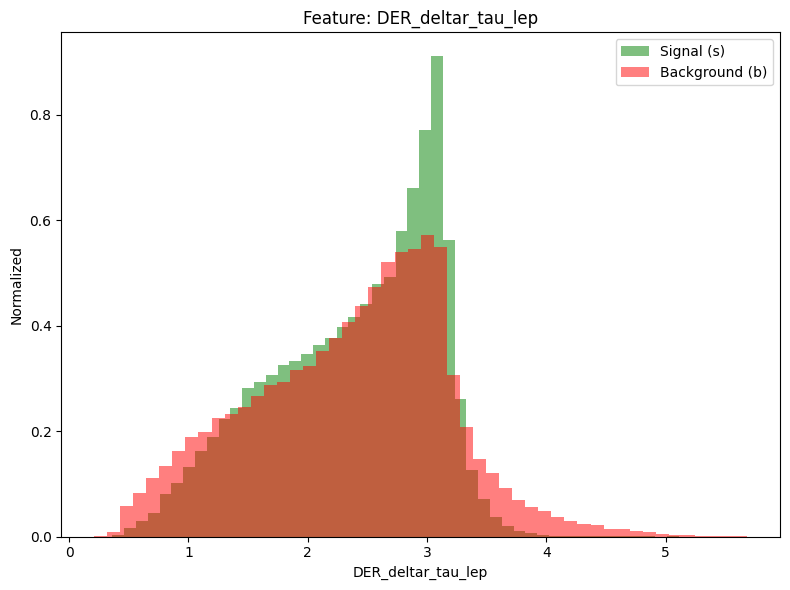

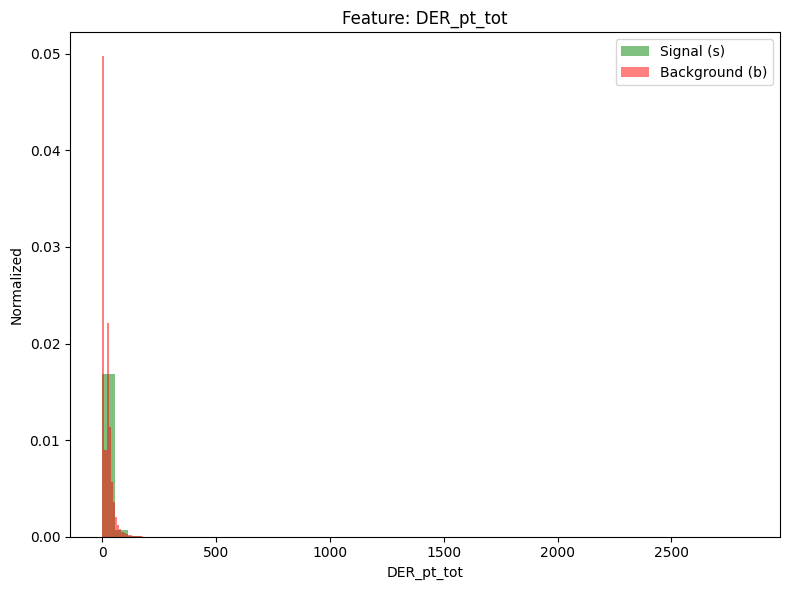

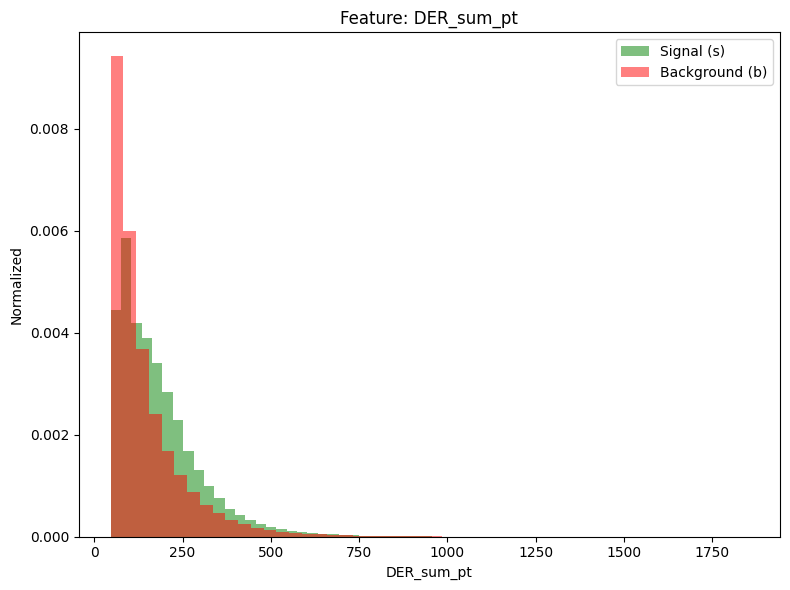

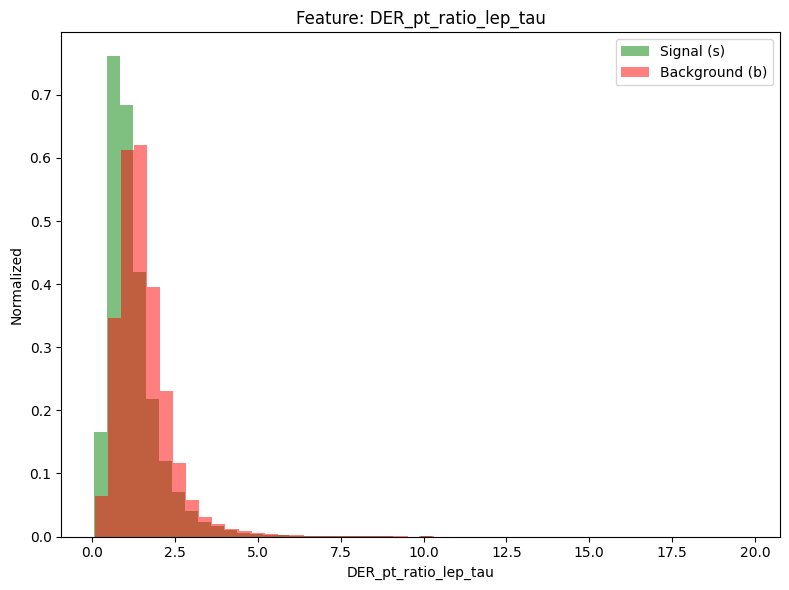

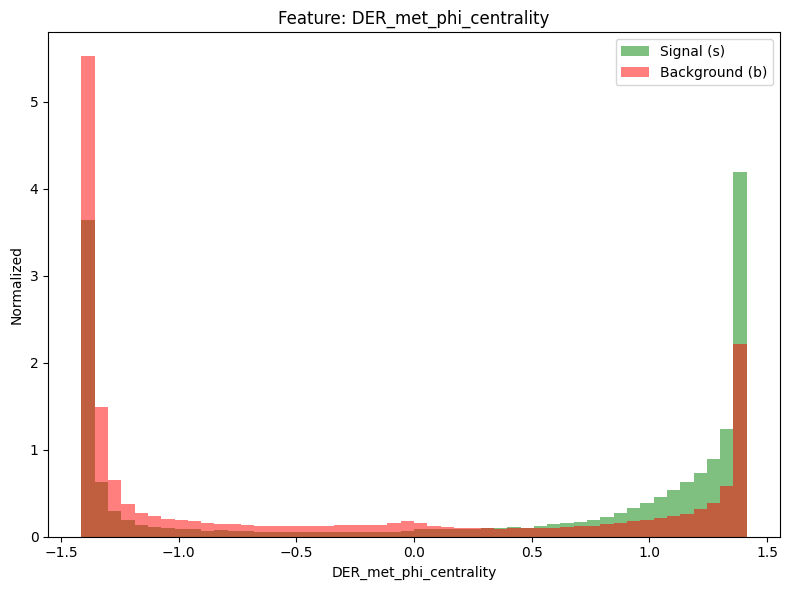

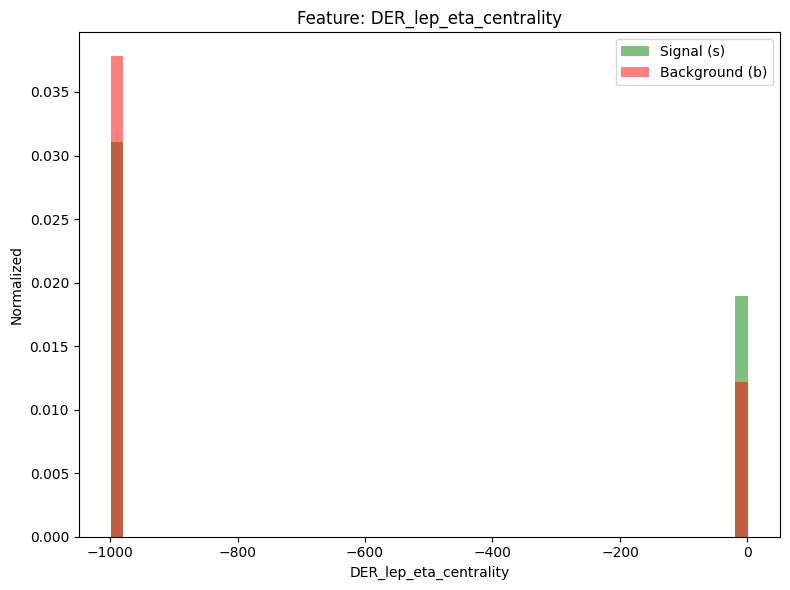

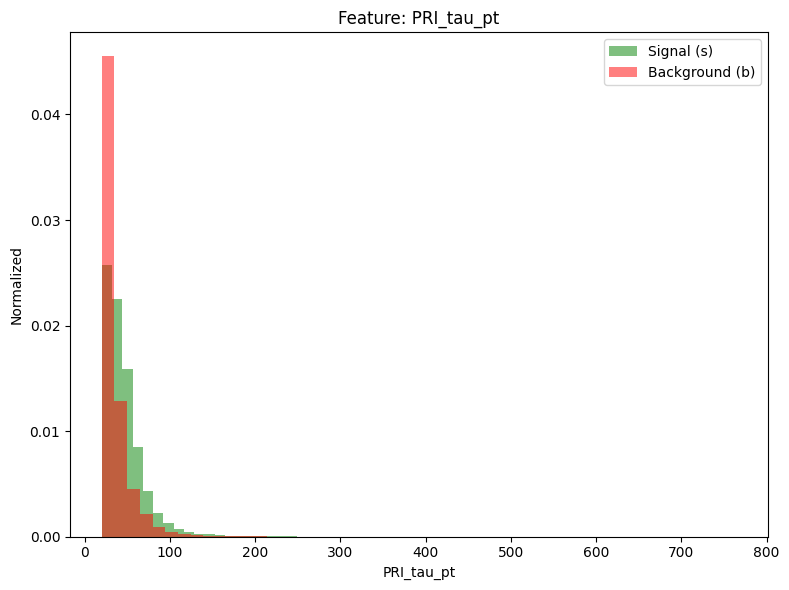

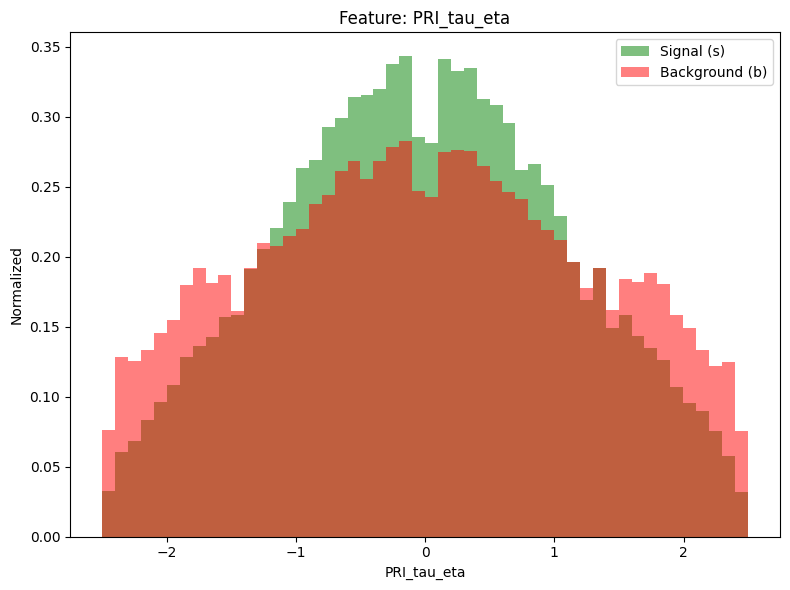

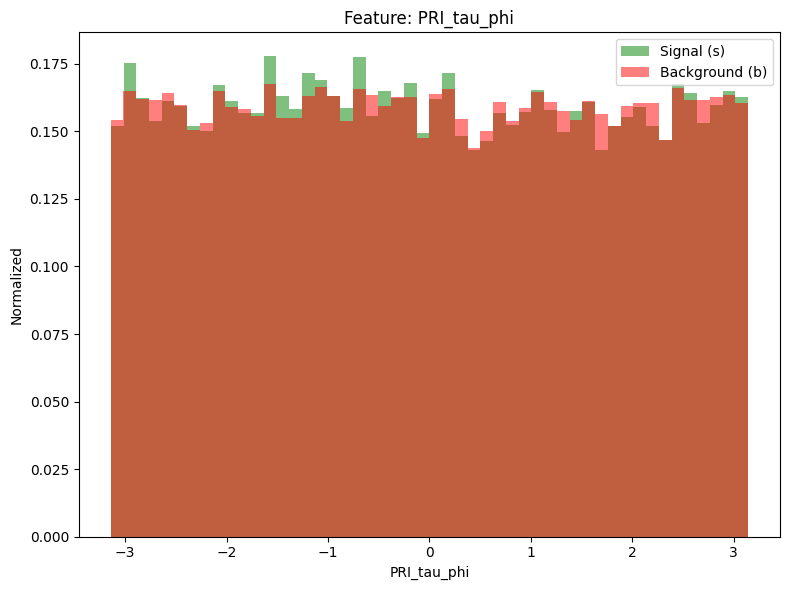

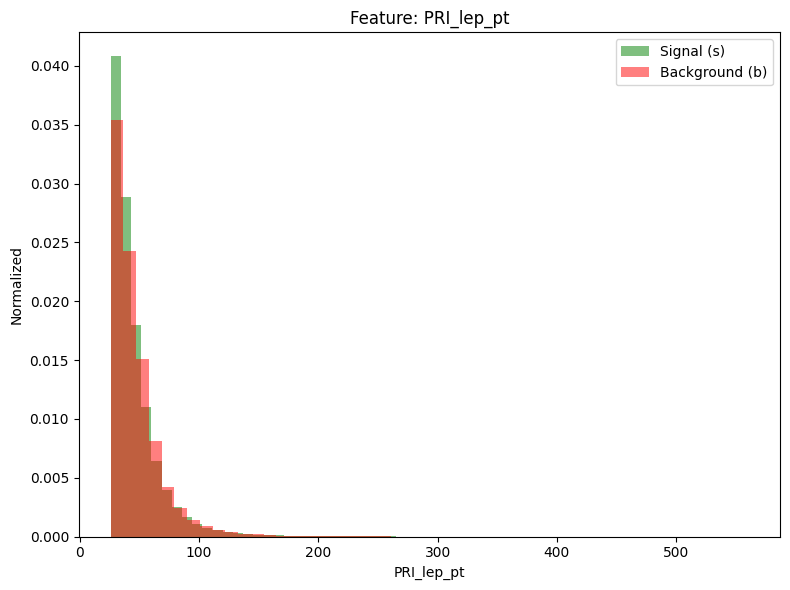

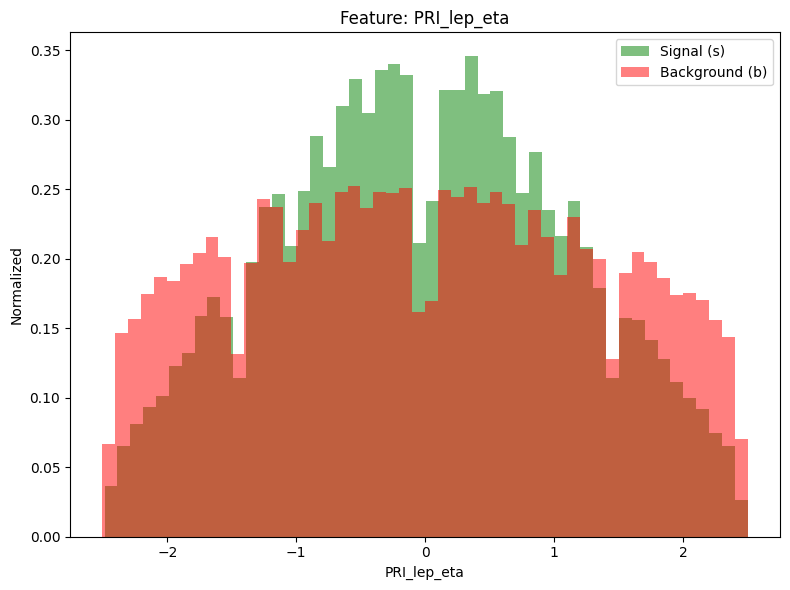

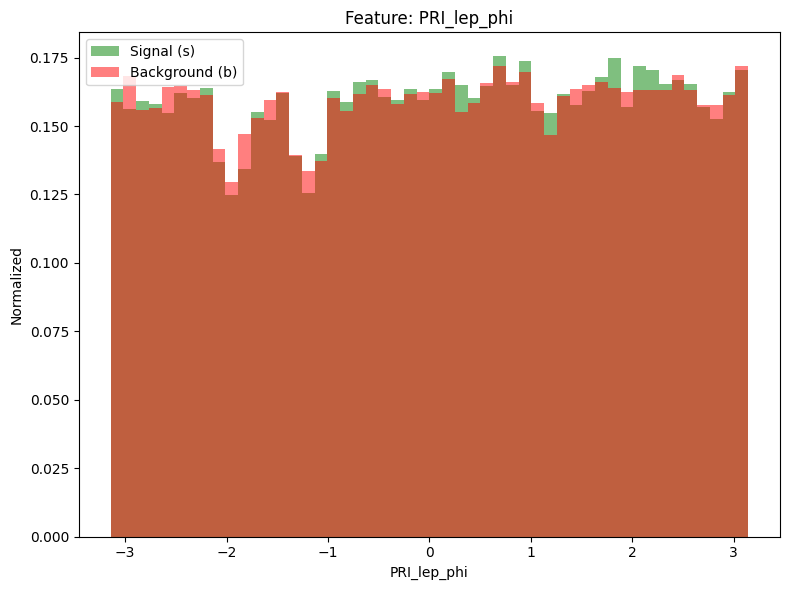

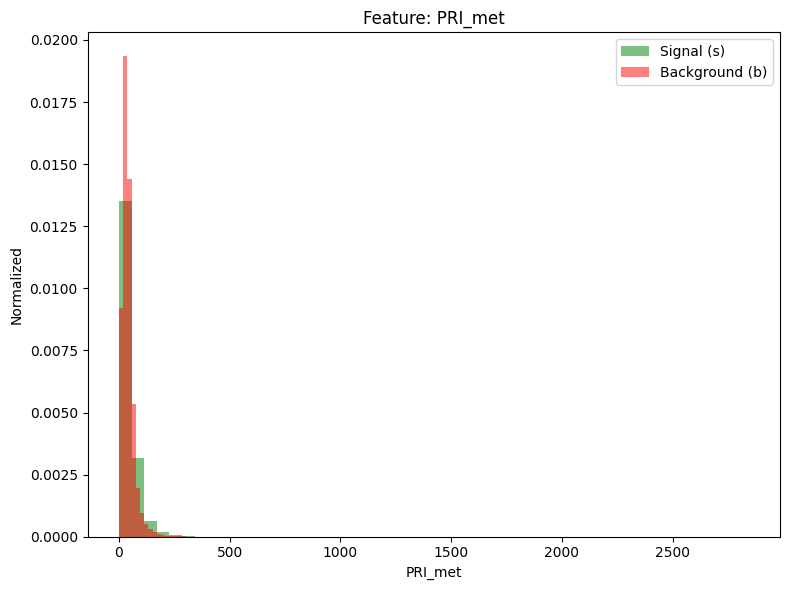

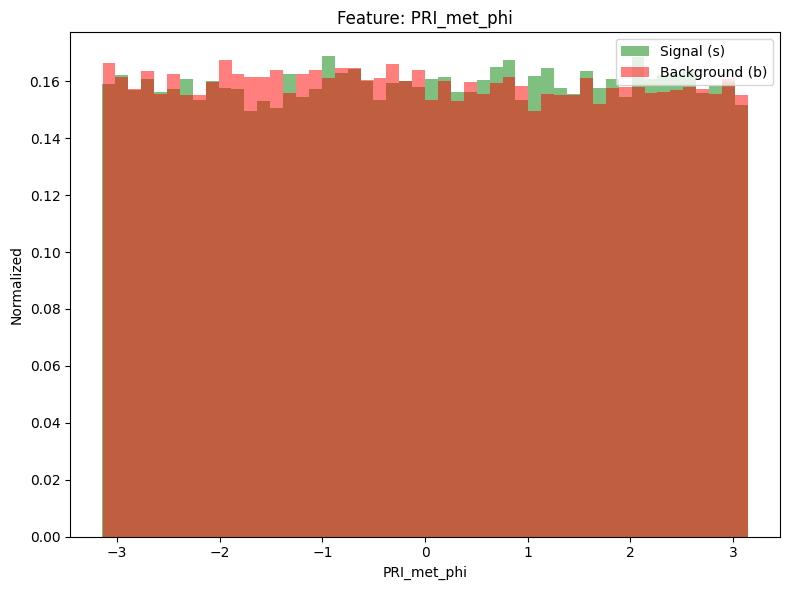

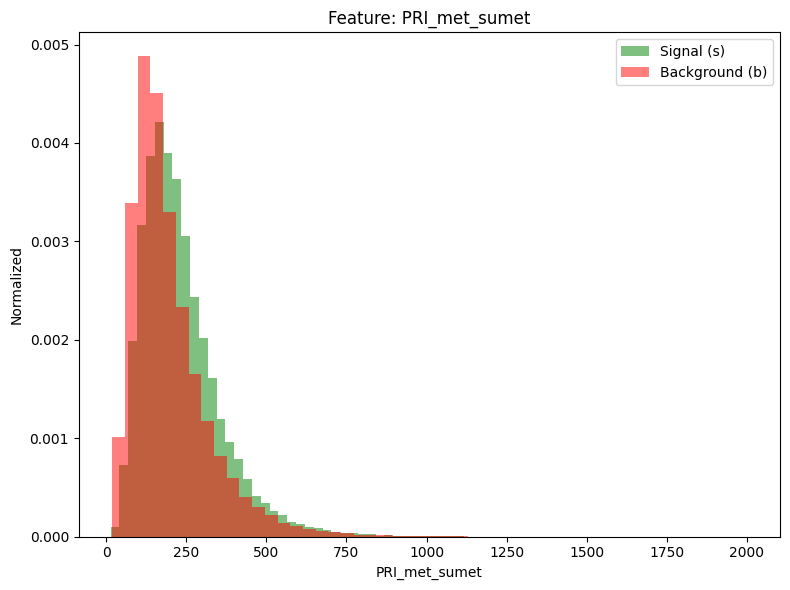

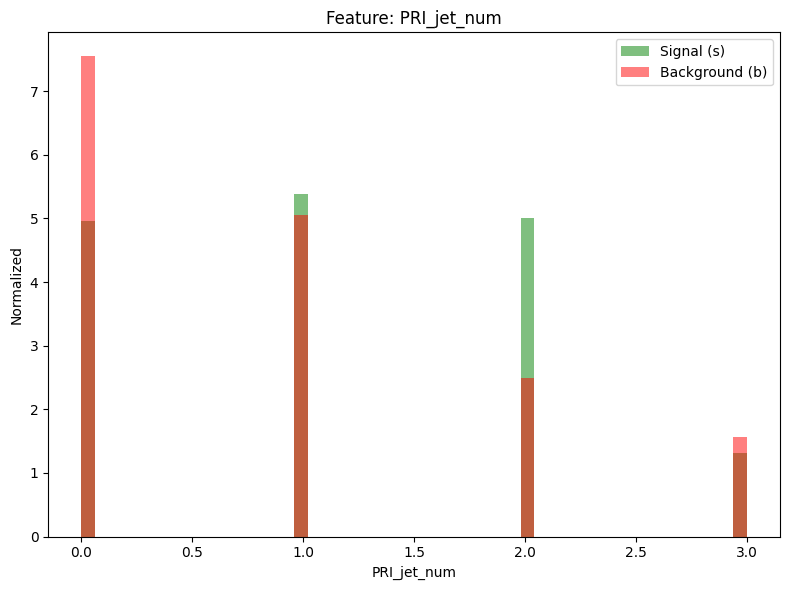

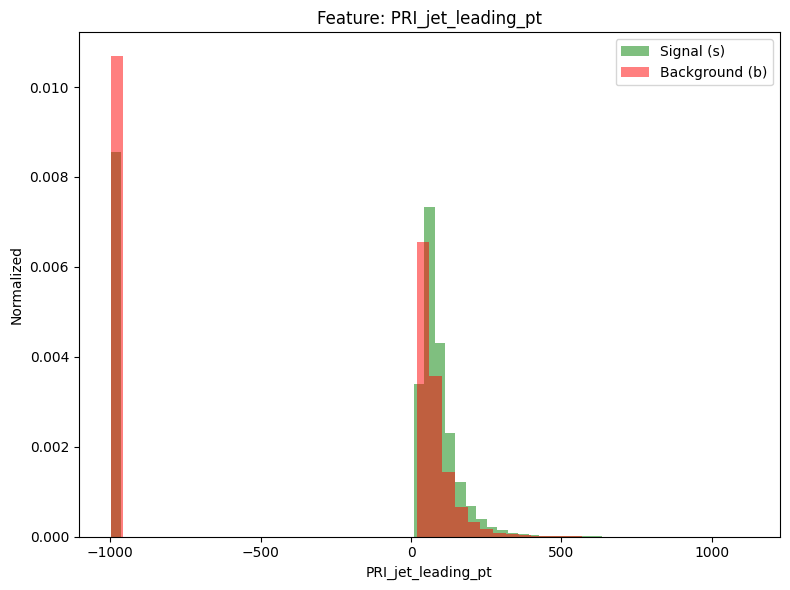

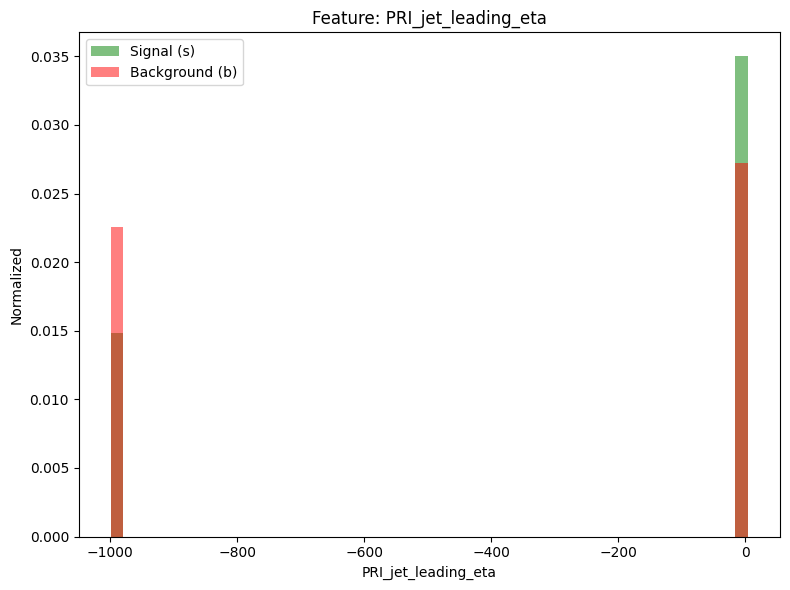

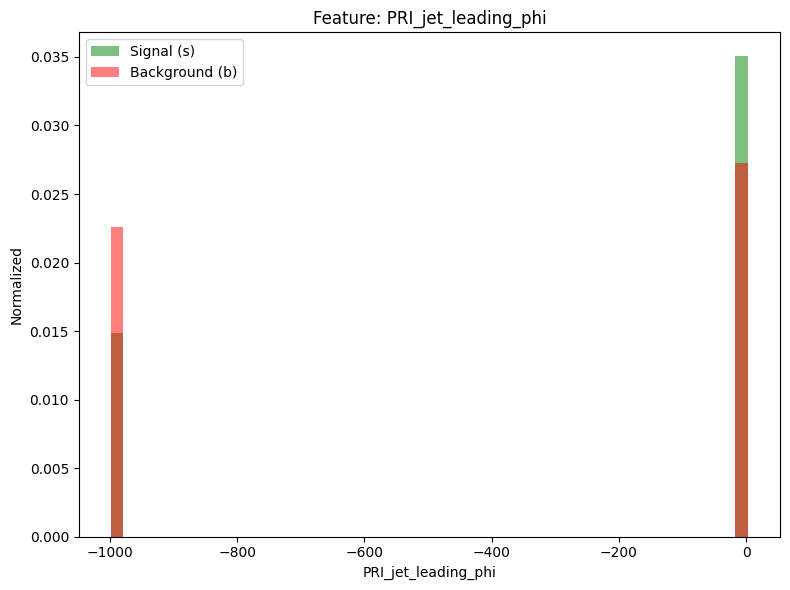

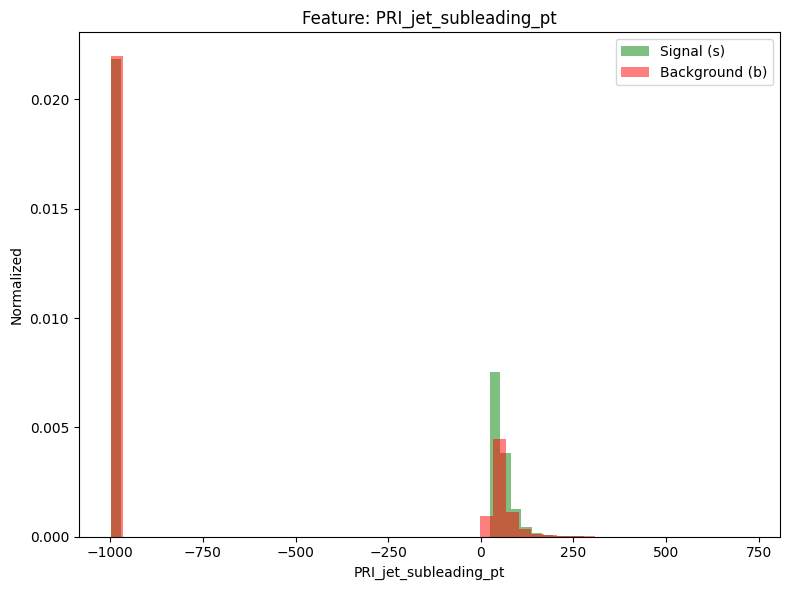

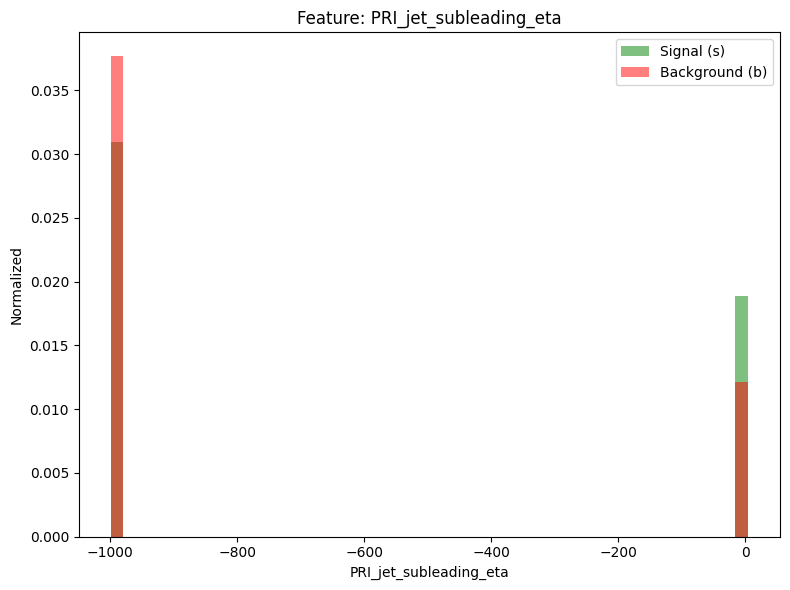

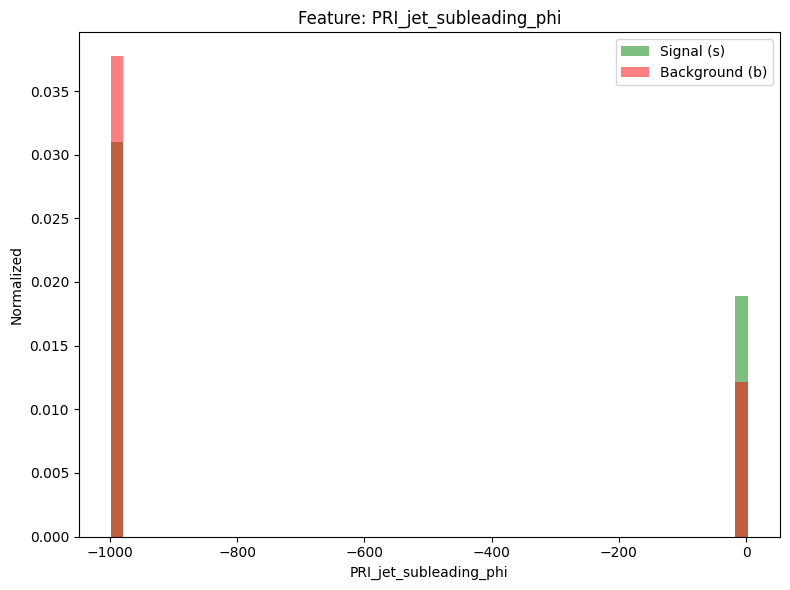

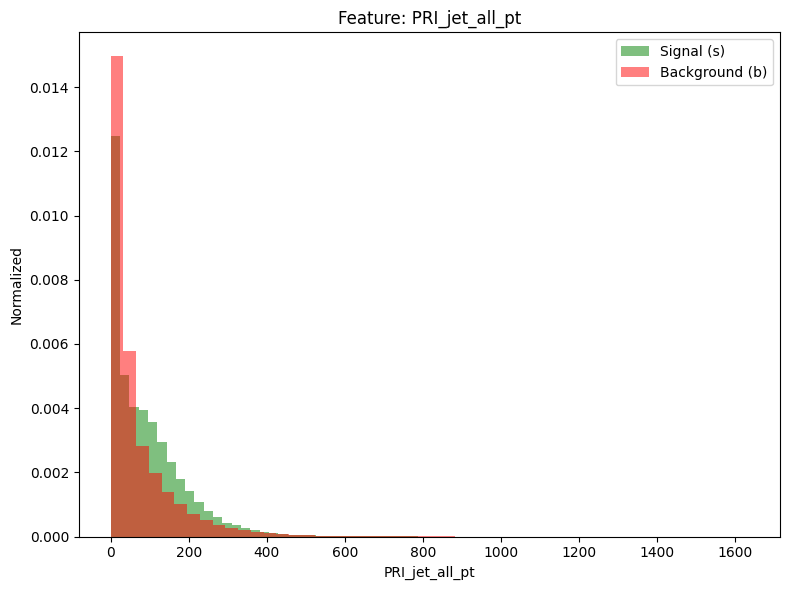

In [38]:
###1.S vs B Histograms (shape normalized)

import matplotlib.pyplot as plt

features = df_train.drop(['EventId', 'Label', 'Weight'], axis=1).columns
signal = df_train[df_train['Label'] == 1]
background = df_train[df_train['Label'] == 0]

# Plotting each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(signal[feature], bins=50, density=True, alpha=0.5, label='Signal (s)', color='green')
    plt.hist(background[feature], bins=50, density=True, alpha=0.5, label='Background (b)', color='red')
    plt.title(f"Feature: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Normalized")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [59]:
ss

NameError: name 'ss' is not defined

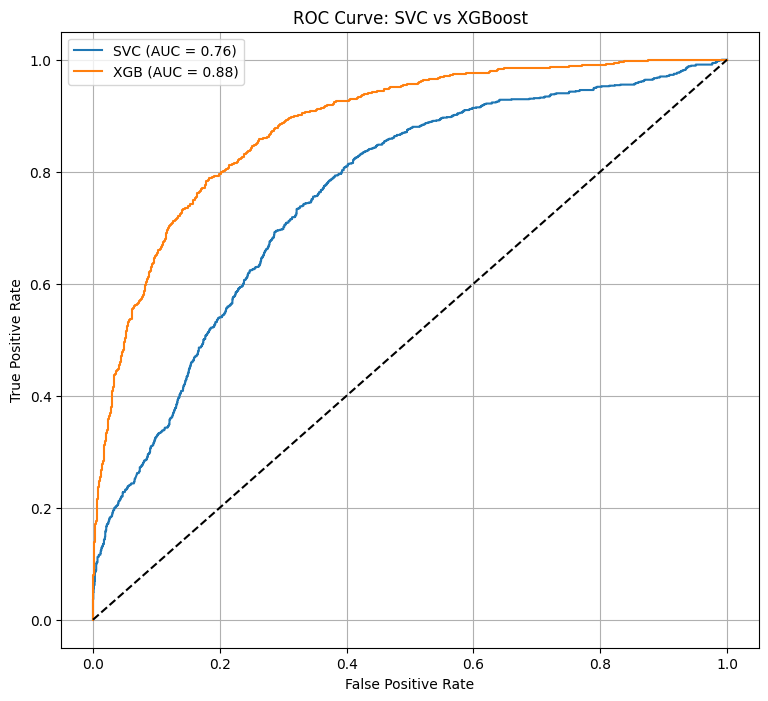

In [49]:
###2.ROC Curve for SVC and XGB

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_score_svc = clf.predict_proba(X_test)[:, 1]
y_score_xgb = xgbc.predict_proba(X_test)[:, 1]

# ROC computation
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC
plt.figure(figsize=(9, 8))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVC vs XGBoost')
plt.legend()
plt.grid()
plt.show()


In [60]:
#### 3) Hyperparameter Tuning (GridSearchCV)
## 3.a SVC Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=3, scoring='roc_auc')
grid_svc.fit(X_train, y_train)

print("Best SVC params:", grid_svc.best_params_)
print("Best SVC AUC:", grid_svc.best_score_)


Best SVC params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVC AUC: 0.8005525614055783


In [63]:
## 3.b XGBoost Tunning 

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.01, 0.1],
    'subsample': [0.7, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=3, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)

print("Best XGB params:", grid_xgb.best_params_)
print("Best XGB AUC:", grid_xgb.best_score_)


Best XGB params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Best XGB AUC: 0.8958802777747636


In [68]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for ROC-AUC
svm_probs = grid_svc.predict_proba(X_test)[:, 1]
xgb_probs = grid_xgb.predict_proba(X_test)[:, 1]

print("SVM ROC-AUC:", roc_auc_score(y_test, svm_probs))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_probs))

SVM ROC-AUC: 0.781256038647343
XGBoost ROC-AUC: 0.8973490184509103
